# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

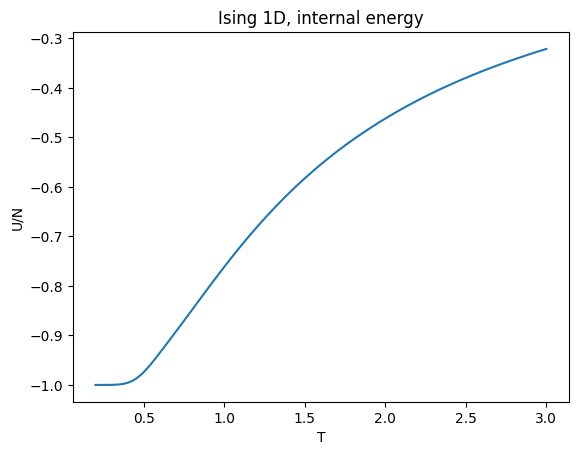

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

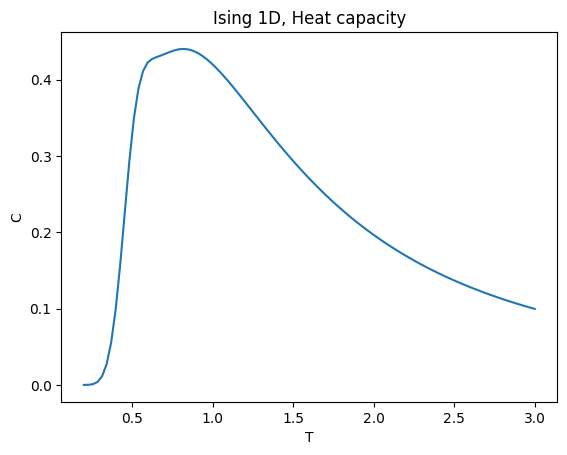

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

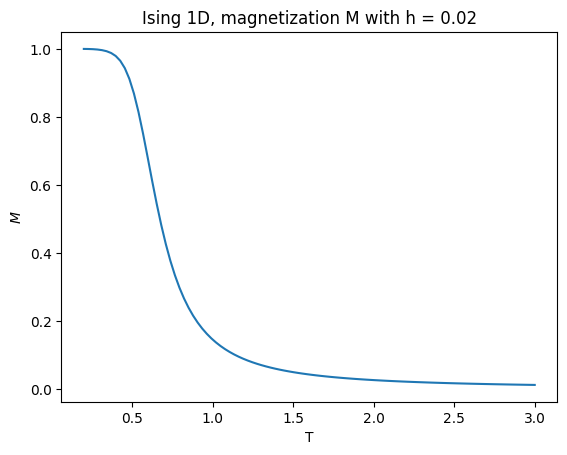

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

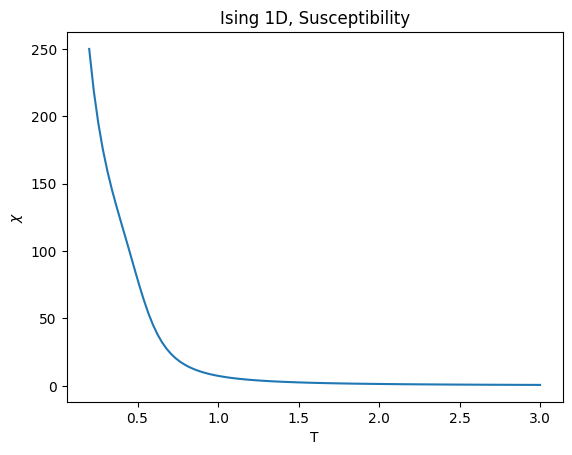

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

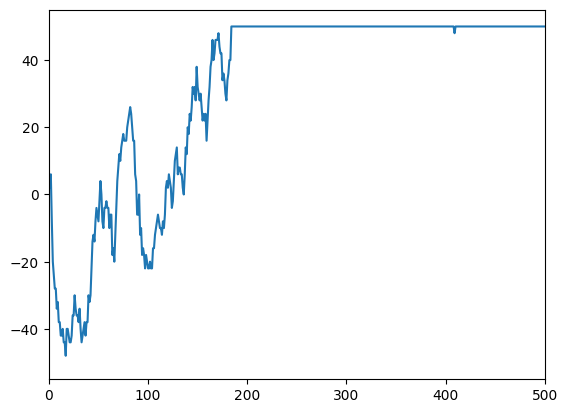

In [2]:
#equilibriamo il sistema plottando la magnetizzazione a T=0.5 per vedere dopo quanti step il sistema è equilibrato

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

n, a = np.loadtxt("magnetization_equilibrium.dat", usecols=(0,1), unpack='true')
plt.plot(n, a)
plt.xlim(0,500)
plt.show()

Per equilibrare il sistema allora sono sufficienti 400 steps

In [23]:
#codice per stampare U, C, CHI, M con Metropolis 

import os
import subprocess
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#esegui file
def esegui_file_exe(percorso_exe):
    if not os.path.exists(percorso_exe):
        print("Il percorso specificato non esiste")
        return
    if not percorso_exe.endswith(".exe"):
        print("Il percorso specificato non punta a un file .exe")
        return
    try: 
        subprocess.run(percorso_exe)
    except Exception as e:
        print("Si è verificato un errore durante l'esecuzione del file .exe", str(e))

#modifica input
def modifica_parametro(file_path, parametro, nuovo_valore):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for i, line in enumerate(lines):
        if parametro in line: 
            lines[i] = line.split()[0] + " " + str(nuovo_valore) + "\n"
            break
    with open(file_path, 'w') as file:
        file.writelines(lines)

outlines = []
for T100 in range(50, 201):
    T = T100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T)
    outlines.append(str(T) + "\t")

    esegui_file_exe("./simulator.exe")
    with open("../OUTPUT/total_energy.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/specific_heat.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/susceptibility.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n" )

with open("metropolis_00.dat", "w") as file:
    file.writelines(outlines)

with open("../INPUT/input.dat", 'r') as file:
    lines = file.readlines()
elements = lines[0].split()
elements[3] = str(0.02)
new_first_line = ' '.join(elements) + '\n'
lines[0] = new_first_line
with open("../INPUT/input.dat", 'w') as file:
    file.writelines(lines)

outlines_m = []
for T_m100 in range(50, 201):
    T_m = T_m100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T_m)
    outlines_m.append(str(T_m) + "\t")

    esegui_file_exe("./simulator.exe")

    with open("../OUTPUT/magnetization.dat", 'r') as file:
        lines = file.readlines()
        outlines_m.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n")

with open("metropolis_02.dat", "w") as file:
    file.writelines(outlines_m)



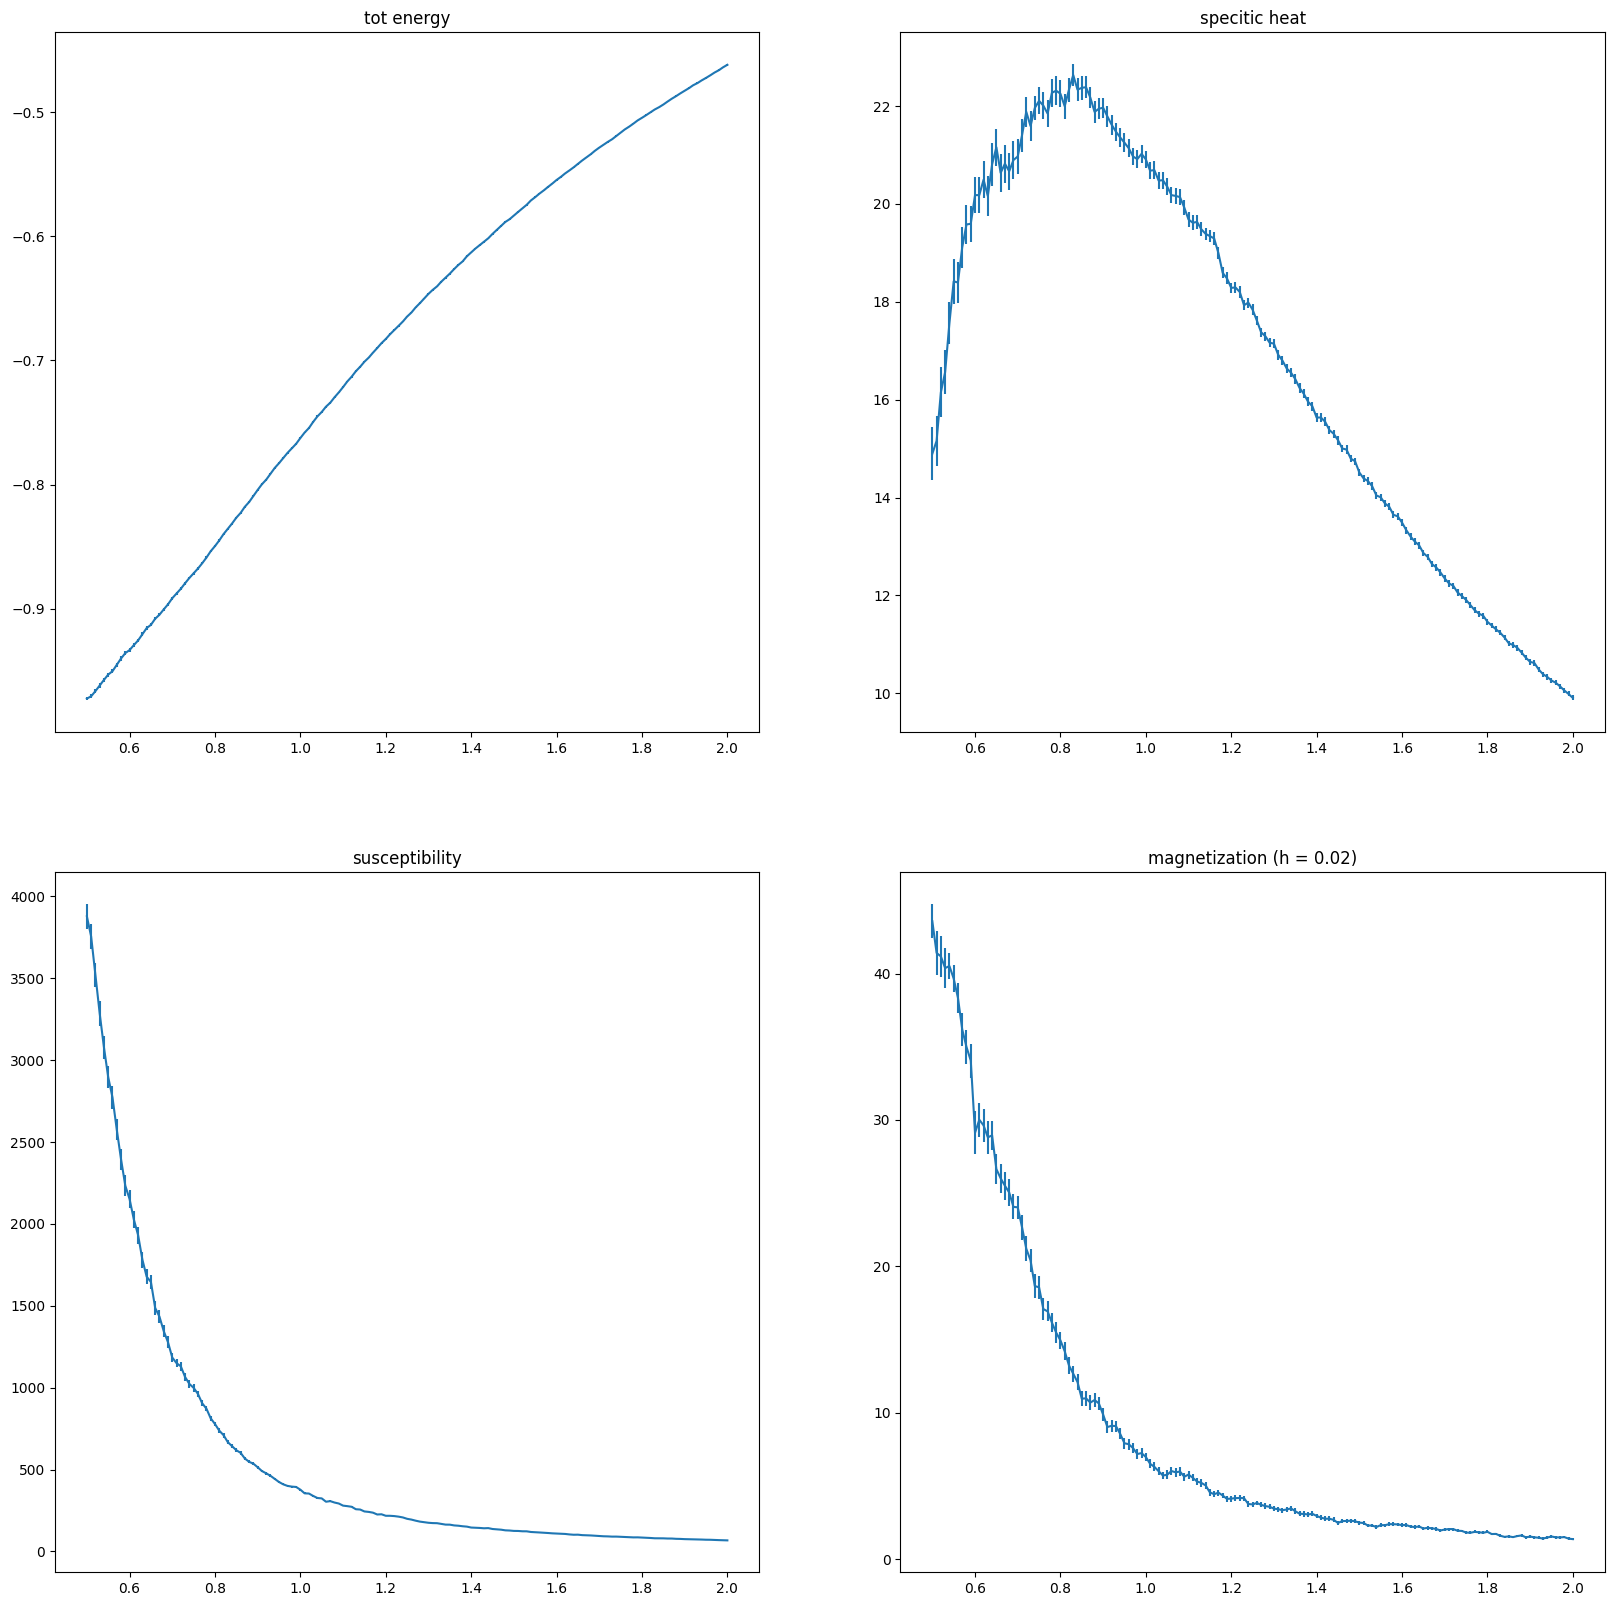

In [24]:
T, E, err_E = np.loadtxt("metropolis_00.dat", usecols=(0,1,2), unpack='true')
T, CV, err_CV = np.loadtxt("metropolis_00.dat", usecols=(0,3,4), unpack='true')
T, S, err_S = np.loadtxt("metropolis_00.dat", usecols=(0,5,6), unpack='true')
T, M, err_M = np.loadtxt("metropolis_02.dat", usecols=(0,1,2), unpack='true')

figure, axis = plt.subplots(2, 2)
figure.set_figwidth (20)
figure.set_figheight (20)

axis [0, 0].errorbar(T, E, yerr = err_E)
axis [0, 0].set_title("tot energy")

axis [0, 1].errorbar(T, CV, yerr = err_CV)
axis [0, 1].set_title("specitic heat")

axis [1, 0].errorbar(T, S, yerr = err_S)
axis [1, 0].set_title("susceptibility")

axis [1, 1].errorbar(T, M, yerr = err_M)
axis [1, 1].set_title("magnetization (h = 0.02)")

plt.show()

In [1]:
#codice per stampare U, C, CHI, M con Gibbs

import os
import subprocess
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#esegui file
def esegui_file_exe(percorso_exe):
    if not os.path.exists(percorso_exe):
        print("Il percorso specificato non esiste")
        return
    if not percorso_exe.endswith(".exe"):
        print("Il percorso specificato non punta a un file .exe")
        return
    try: 
        subprocess.run(percorso_exe)
    except Exception as e:
        print("Si è verificato un errore durante l'esecuzione del file .exe", str(e))

#modifica input
def modifica_parametro(file_path, parametro, nuovo_valore):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for i, line in enumerate(lines):
        if parametro in line: 
            lines[i] = line.split()[0] + " " + str(nuovo_valore) + "\n"
            break
    with open(file_path, 'w') as file:
        file.writelines(lines)

outlines = []
for T100 in range(50, 201):
    T = T100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T)
    outlines.append(str(T) + "\t")

    esegui_file_exe("./simulator.exe")
    with open("../OUTPUT/total_energy.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/specific_heat.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/susceptibility.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n" )

with open("Gibbs_00.dat", "w") as file:
    file.writelines(outlines)

with open("../INPUT/input.dat", 'r') as file:
    lines = file.readlines()
elements = lines[0].split()
elements[3] = str(0.02)
new_first_line = ' '.join(elements) + '\n'
lines[0] = new_first_line
with open("../INPUT/input.dat", 'w') as file:
    file.writelines(lines)

outlines_m = []
for T_m100 in range(50, 201):
    T_m = T_m100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T_m)
    outlines_m.append(str(T_m) + "\t")

    esegui_file_exe("./simulator.exe")

    with open("../OUTPUT/magnetization.dat", 'r') as file:
        lines = file.readlines()
        outlines_m.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n")

with open("Gibbs_02.dat", "w") as file:
    file.writelines(outlines_m)



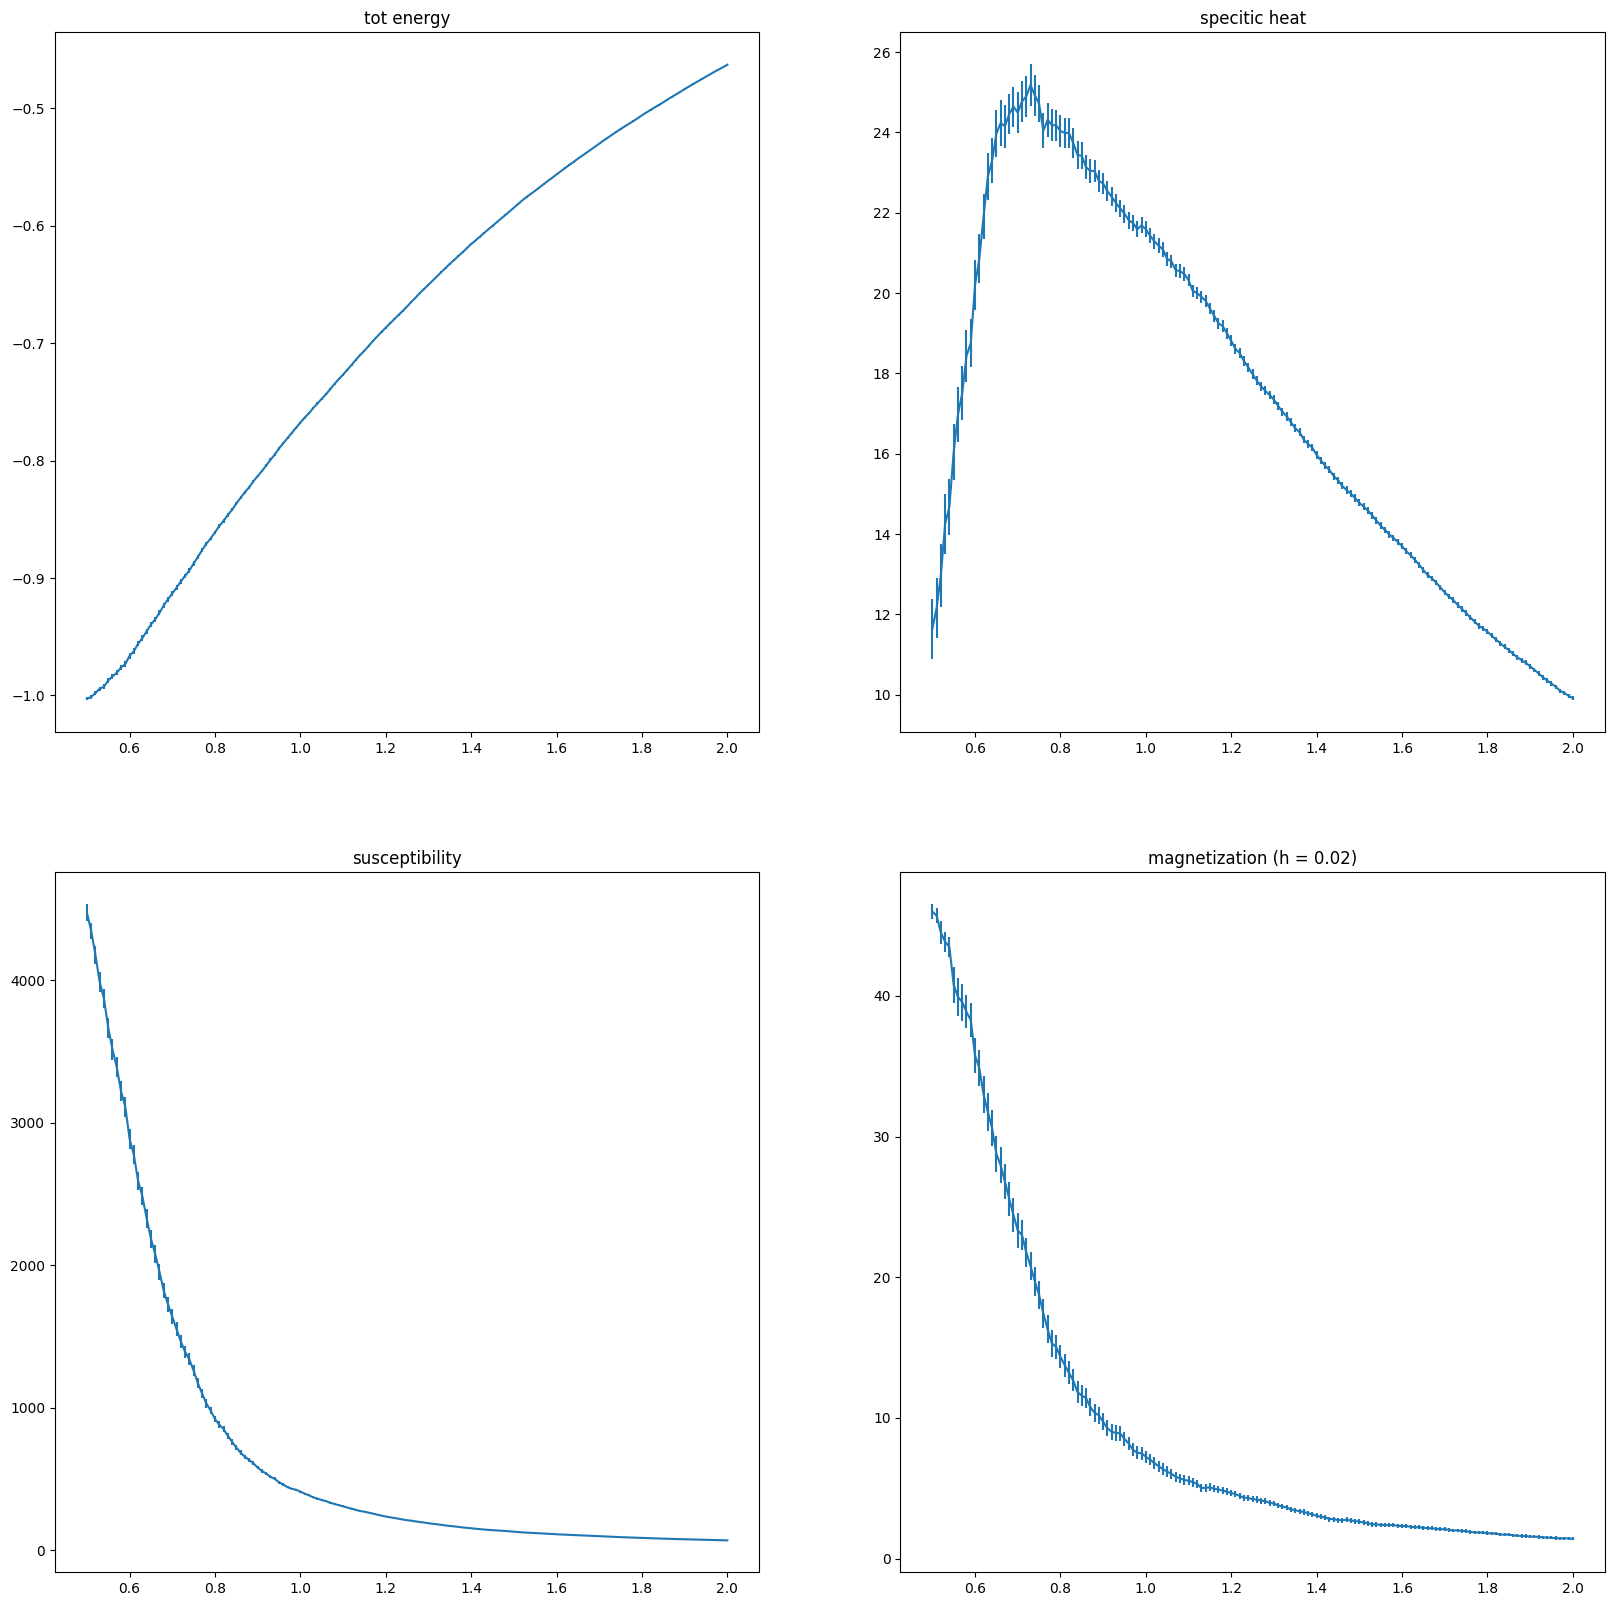

In [2]:
T, E, err_E = np.loadtxt("Gibbs_00.dat", usecols=(0,1,2), unpack='true')
T, CV, err_CV = np.loadtxt("Gibbs_00.dat", usecols=(0,3,4), unpack='true')
T, S, err_S = np.loadtxt("Gibbs_00.dat", usecols=(0,5,6), unpack='true')
T, M, err_M = np.loadtxt("Gibbs_02.dat", usecols=(0,1,2), unpack='true')

figure, axis = plt.subplots(2, 2)
figure.set_figwidth (20)
figure.set_figheight (20)

axis [0, 0].errorbar(T, E, yerr = err_E)
axis [0, 0].set_title("tot energy")

axis [0, 1].errorbar(T, CV, yerr = err_CV)
axis [0, 1].set_title("specitic heat")

axis [1, 0].errorbar(T, S, yerr = err_S)
axis [1, 0].set_title("susceptibility")

axis [1, 1].errorbar(T, M, yerr = err_M)
axis [1, 1].set_title("magnetization (h = 0.02)")

plt.show()